In [77]:
#add matplotlib inline magic command 
%matplotlib inline 
#dependencies and setup 
import matplotlib.pyplot as plt
import pandas as pd 
import os


In [78]:
#file to load
city_data_to_load=os.path.join("resources","city_data.csv")
ride_data_to_load=os.path.join("resources","ride_data.csv")

In [79]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [80]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [81]:
#get the columns and the rows that are not null 
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [82]:
#get the columns and the rows that are not null 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [83]:
#get the data types of each column 
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [84]:
#get the unique values of the type of city 
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [85]:
#Now we can use the sum() method on the city_data_df for the type column where the condition equals either Urban, Suburban, or Rural.
#To get the number of data points for the Urban cities, add the following code to a new cell:

#get the number of data points from teh urgan cities 
sum((city_data_df["type"]=="Suburban"))#|(city_data_df["type"]=="Rural"))


36

In [86]:
#get the columns and the rows that are not null 
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [87]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [88]:
#get the data types of each column 
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [89]:
# Combine the data into a single dataset 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


#display the DataFrame
pyber_data_df.head(15)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [90]:
#create data frames to seperate based on type
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]



In [91]:
#get the number of rides for cities 
urban_ride_count = urban_cities_df.groupby(["city"])["ride_id"].count()
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [92]:
#Get average fare for each city in the urban cities 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
subruban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]




In [93]:
# get the average driver count for the cities 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(["city"]).mean()['driver_count']


TypeError: 'Legend' object is not iterable

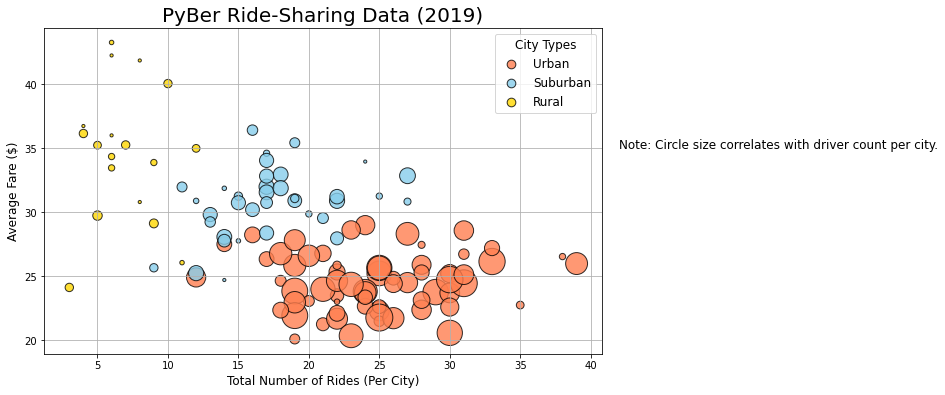

In [101]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      subruban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Add the legend.
plt.legend(lgnd)
# Show the plot
plt.show()
# Save the figure.
plt.savefig("analysis/Fig1.png")


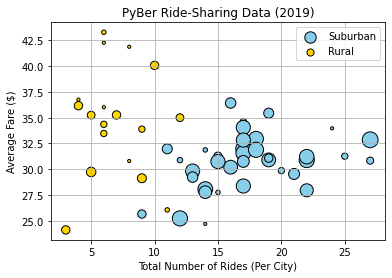

In [65]:
# Create chart for suburban cities 
plt.scatter(suburban_ride_count,subruban_avg_fare,
           s = 10*suburban_driver_count,
            c = "skyblue",
            edgecolor="black",
            linewidth = 1,
            label = "Suburban"
                    
           )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

plt.scatter(rural_ride_count,rural_avg_fare,
           s = 10*rural_driver_count,
            c = "gold",
            edgecolor="black",
            linewidth = 1,
            label = "Rural"
                    
           )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

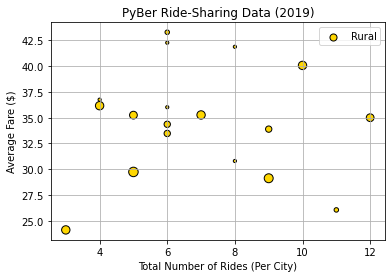

In [57]:
plt.scatter(rural_ride_count,rural_avg_fare,
           s = 10*rural_driver_count,
            c = "gold",
            edgecolor="black",
            linewidth = 1,
            label = "Rural"
                    
           )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()